In [2]:
# Week 1 Assignment – EDA and Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# Load dataset
df = pd.read_csv("DDH Data with Properties.csv")

### ---------------------- 1. EDA ----------------------





First 5 rows:
       CID                                             SMILES  \
0  2744814  ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...   
1  2821293  CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...   
2  2820912  CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...   
3  2820914  CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...   
4  2744846  CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...   

  MolecularFormula  MolecularWeight  \
0   C21H14Cl2N4OS2            473.4   
1  C21H15ClF3N5OS2            510.0   
2    C22H19ClN4OS4            519.1   
3    C22H19ClN4OS4            519.1   
4    C19H14ClN5OS3            460.0   

                                               InChI  \
0  InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...   
1  InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...   
2  InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...   
3  InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...   
4  InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...   

                      I

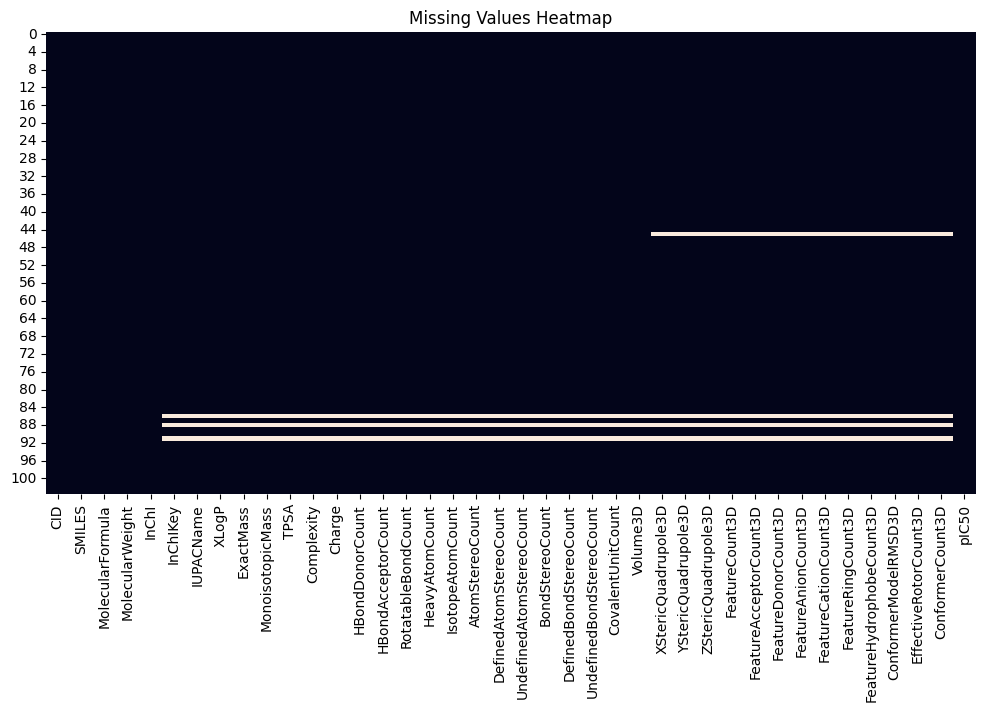


Non-numeric 'pIC50' entries (cleaned): 10

Cleaned Data Sample:
                                 SMILES_clean  \
0    clc1ccncocsc2ncccn2c2cscn2c2ccccc2ccclc1   
1  cn1nccc1cfffc1cccs1c1ccncscconc2cccclcc2n1   
2   csc1ccccs1c1ncccs1c1ccncscconc2cccclcc2n1   
4      cc1nccs1c1nccs1c1ncscconc2cccclcc2ncc1   
5      clc1cccncocsc2ncccn2c2ccno2c2ccccc2cc1   

                                     IUPACName_clean  pIC50_clean  
0  n35dichlorophenyl242phenyl13thiazol4ylpyrimidi...    -0.477121  
1  n4chlorophenyl2451methyl5trifluoromethylpyrazo...    -1.000000  
2  n4chlorophenyl244methyl2methylsulfanyl54methyl...    -1.041393  
4  n4chlorophenyl2422methyl13thiazol4yl13thiazol4...    -1.146128  
5  n4chlorophenyl243phenyl12oxazol5ylpyrimidin2yl...    -1.176091  

Cleaned dataset saved as 'cleaned_DDH_dataset.csv'


In [3]:
# 1.1 First few rows
print("First 5 rows:")
print(df.head())

# 1.2 Shape and info
print(f"\nShape: {df.shape}")
print("\nData Info:")
print(df.info())

# 1.3 Check for duplicates
duplicates = df.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates()

# 1.4 Check for missing values
missing = df.isnull().sum()
print("\nMissing values per column:")
print(missing[missing > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 1.5 Data consistency check (example: pIC50 column should be numeric)
df['pIC50_clean'] = pd.to_numeric(df['pIC50'], errors='coerce')
non_numeric = df['pIC50'].isna().sum()
print(f"\nNon-numeric 'pIC50' entries (cleaned): {df['pIC50_clean'].isna().sum()}")

# Drop rows with missing target
df = df.dropna(subset=['pIC50_clean'])

### ---------------------- 2. Preprocessing ----------------------

# Function to clean text fields
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', '', text)  # Remove special characters
    return text

# Clean 'SMILES' and 'IUPACName' columns (where appropriate)
df['SMILES_clean'] = df['SMILES'].apply(lambda x: clean_text(x))
df['IUPACName_clean'] = df['IUPACName'].fillna('').apply(lambda x: clean_text(x))

# Drop unnecessary columns for modeling
final_df = df[['SMILES_clean', 'IUPACName_clean', 'pIC50_clean']]

print("\nCleaned Data Sample:")
print(final_df.head())

# Save cleaned dataset
final_df.to_csv("cleaned_DDH_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_DDH_dataset.csv'")